#                                 PRML ASSIGNMENT - 2
## Name : Aditya Sahani
## Roll No : B22CS003








# Decision Tree Classifier

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [127]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")   ## reading the csv file using pandas

In [128]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Task 1

In [129]:
## overview of the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [130]:
## overview of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
## checking the null values in dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [132]:
## from the above analysis we can see that
## 177 null values in Age column
## 687 null values in Cabin column
## 2 null values in Embarked column

In [133]:
## filling the "Embarked" column
df["Embarked"].value_counts()
## S = Southampton
## C = Cherbourg
## Q = Queenstown

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [134]:
## As we can see S = Southampton is the most frequent , we will fill the missing values by 'S'
mode_embarked = df["Embarked"].mode()
df["Embarked"] = df["Embarked"].fillna(mode_embarked[0])  ## filling the missing value using mode

<Axes: xlabel='Age', ylabel='Count'>

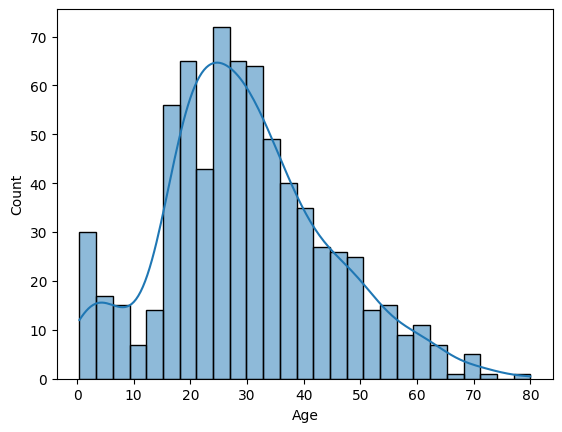

In [135]:
## working with missing values in age column
sns.histplot(df, x="Age", binwidth=3, kde=True)
## more people lies between the age of 20 and 30 : [20,300]

In [136]:
df["Age"] = df["Age"].fillna(df["Age"].mean())  ## filling the age column with mean

In [137]:
## as there are large number of missing values in cabin , we will remove that column

In [138]:
df = df.drop(columns=["Cabin"])

In [139]:
df.isnull().sum()  ## all missing values are corrected now

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [140]:
## checking for the duplicated rows
df.duplicated().sum()

0

In [141]:
## we don't need the Name, PassengerId, Ticket column in our dataset
df =  df.drop(columns=["Name","PassengerId","Ticket"])

In [142]:
## final dataset
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


EXPLORATORY DATA ANALYSIS

<Axes: xlabel='Survived', ylabel='count'>

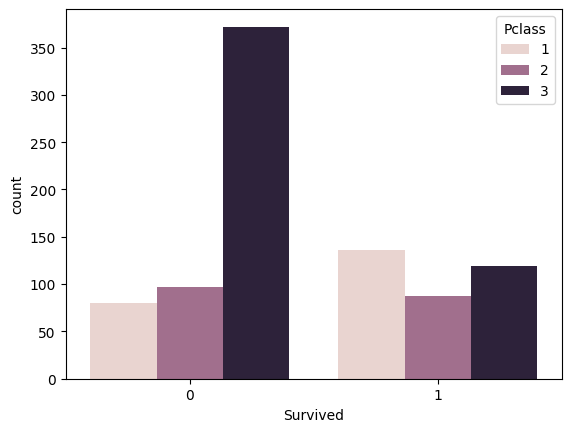

In [143]:
sns.countplot(x = 'Survived',data=df,hue='Pclass')  ## casualities caused to Passenger Class 1 is more

<Axes: xlabel='Survived', ylabel='count'>

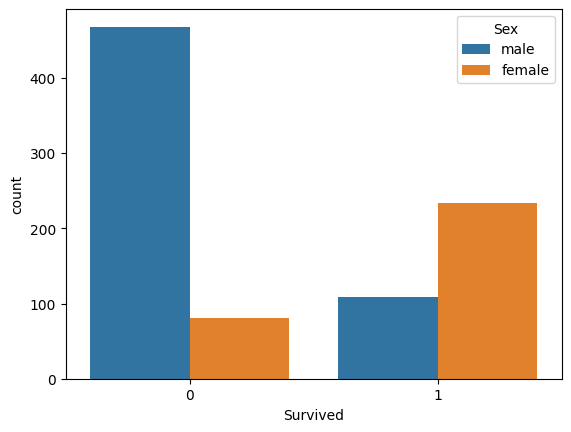

In [144]:
sns.countplot(x="Survived", data=df, hue="Sex")  ## casualities caused to men are more

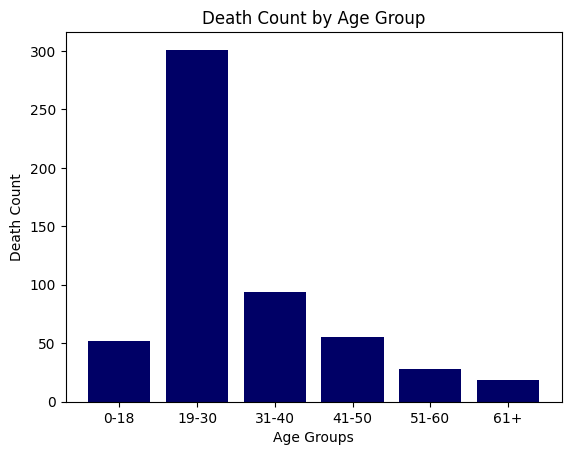

In [145]:

data = {'Age': df["Age"].tolist(),
        'Survived': df["Survived"].tolist()}
titanic_data = pd.DataFrame(data)

# Define age bins and labels for better visualization
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']

# Create a new column 'AgeGroup' using cut() to categorize ages into bins
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of deaths (Survived=0) in each age group
death_counts = titanic_data[titanic_data['Survived'] == 0]['AgeGroup'].value_counts().sort_index()

# Plotting the bar chart
plt.bar(death_counts.index, death_counts, color='#000066')
plt.xlabel('Age Groups')
plt.ylabel('Death Count')
plt.title('Death Count by Age Group')
plt.show()


In [146]:
## from the above graph we can see that age group between [19-30] suffered more casualities

<Axes: xlabel='Survived', ylabel='count'>

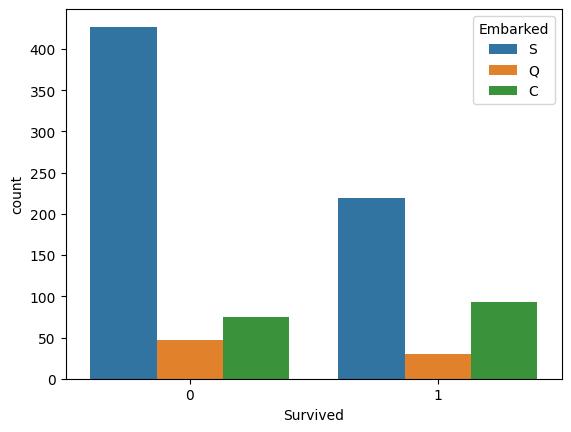

In [147]:
sns.countplot(x = 'Survived',data=df,hue='Embarked')  ## plot based on survival and death rate of the people from different embarked places

<Axes: xlabel='Survived', ylabel='Fare'>

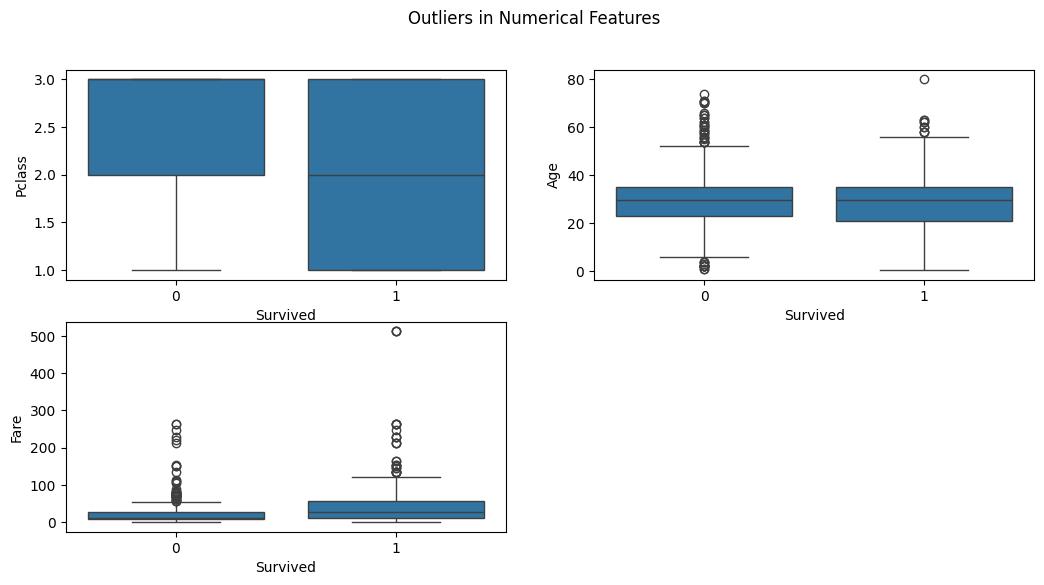

In [148]:
# plotting  for outliers
figure, axes = plt.subplots(2, 2, figsize = (12.5, 6))
figure.suptitle("Outliers in Numerical Features")
figure.delaxes(axes[1][1])

sns.boxplot(ax = axes[0, 0], data = df, x = "Survived", y = "Pclass")
sns.boxplot(ax = axes[0, 1], data = df, x = "Survived", y = "Age")
sns.boxplot(ax = axes[1, 0], data = df, x = "Survived", y = "Fare")

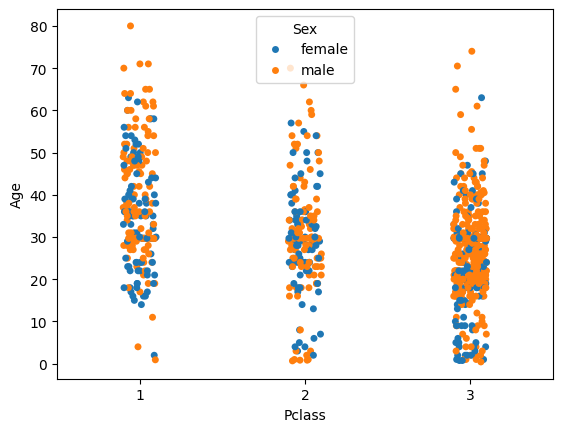

In [149]:
sns.stripplot(x='Pclass', y='Age',hue="Sex", data=df, jitter=True)
plt.show()

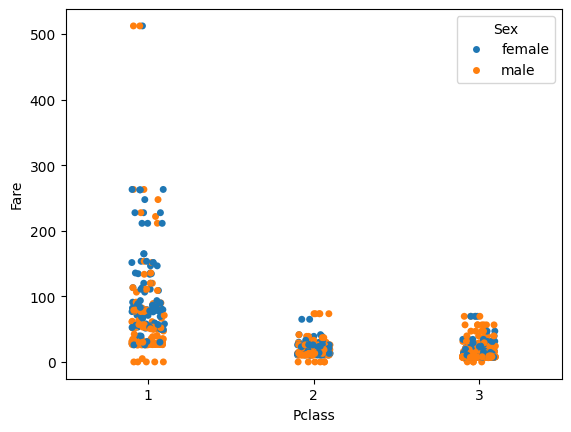

In [150]:
sns.stripplot(x='Pclass', y='Fare',hue="Sex", data=df, jitter=True)
plt.show()

### Ordinal and Nominal Columnns

#### Nominal data :  represents categories or labels without any inherent order or ranking. For example : color, gender etc.
#### Ordinal data : represents categories with a meaningful order or ranking. For example : educational level(school, UG, PG) etc.

#### Nominal and Ordinal are only valid for categorical data.
#### Columns : Embarked, Sex, Survived, PClass, Name, Ticket , Cabin
##### Nominal Columns : Name, Sex, Ticket , Cabin , Embarked
##### Ordinal Columns : PClass

In [151]:
## Categorical Encoding Funtion

def cat_encode(X):
  classes = X.unique()
  class_dict = {}
  k = 0
  for i in classes:
    class_dict[i] = k
    k = k + 1

  X = X.apply(lambda x : class_dict[x])
  return X

In [152]:
## Performing the categorical encoding on Sex and Embarked Column

df["Sex"] = cat_encode(df["Sex"])
df["Embarked"] = cat_encode(df["Embarked"])

In [153]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [154]:
## Performing the train test split
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the data into training (70%) and temporary (30%)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temporary data into validation (20%) and final test (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=1/3, random_state=42)

# Display the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Train set size: 415
Validation set size: 208
Test set size: 268


## Task 2

In [155]:
## Implementing the entropy function to calculate the split
## Entropy Formula : -plog2(p) summed over the no of classes
def entropy(X):
  zero , one = count_target(X)
  survived = one
  died = zero
  prob_sur = survived / (died + survived)
  prob_died = died / (survived + died)
  entropy = 0
  if prob_sur != 0 and prob_died != 0:
   entropy = -1 * prob_sur * np.log2(prob_sur) - 1 * prob_died * np.log2(prob_died)
  elif prob_sur == 0 and prob_died != 0:
    entropy = - 1 * prob_died * np.log2(prob_died)
  elif prob_sur != 0 and prob_died == 0:
    entropy = 1 * prob_sur * np.log2(prob_sur)
  else:
    entropy = 0
  return entropy


def count_target(X):
  zero = X[X["Survived"] == 0].shape[0]
  one = X[X["Survived"] == 1].shape[0]
  return zero, one


## Task - 3

In [156]:
## our first task is to convert the numerical columns like age to categorical columns
## Methods :

## equal width binning
## equal frequency binning
## k-means binning
## to implement above binning we will be using sklearn "KBinsDiscretizer"

## OR

## we can split the data using the best split method

In [157]:
## sibling-spouse and parent-children columns can be converted to a single family column
df["Family"] = df["SibSp"] + df["Parch"]
df = df.drop(columns=["SibSp","Parch"])

In [158]:
df_copy = df.copy(deep=True)

In [159]:
df_copy

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,22.000000,7.2500,0,1
1,1,1,1,38.000000,71.2833,1,1
2,1,3,1,26.000000,7.9250,0,0
3,1,1,1,35.000000,53.1000,0,1
4,0,3,0,35.000000,8.0500,0,0
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,13.0000,0,0
887,1,1,1,19.000000,30.0000,0,0
888,0,3,1,29.699118,23.4500,0,3
889,1,1,0,26.000000,30.0000,1,0


In [160]:
## binning method for converting numerical columns to categorical columns
def BinningMethod(df):
    from sklearn.preprocessing import KBinsDiscretizer
    est = KBinsDiscretizer(n_bins=8, encode='ordinal',
                           strategy='uniform')
    df['Age'] = est.fit_transform(df[['Age']])
    est = KBinsDiscretizer(n_bins=8, encode='ordinal',
                           strategy='uniform')
    df['Fare'] = est.fit_transform(df[['Fare']])
    return df


In [161]:
## Using best split method as given in slides
def conTocat(Y, threshold_value, column_name):
  X = Y.copy(deep=True)
  X[column_name] = X[column_name].apply(lambda x : 1 if x >= threshold_value  else 0)
  return X

In [162]:
def best_threshold_value(dataset, column_name):
  sorted_df = dataset.sort_values(by=column_name, ascending=True)
  consecutive_means_column = sorted_df[column_name].to_list()
  threshold_values = {}

  for i in consecutive_means_column:
    sorted_df1 = sorted_df.copy(deep=True)
    sorted_df1[column_name] = sorted_df1[column_name].apply(lambda x : 0 if  x < i else 1)
    my_columns = ["Survived",column_name]
    sorted_df2 = sorted_df1[my_columns]
    info_gain = gain(sorted_df2, column_name)
    threshold_values[i] = info_gain

  # print(threshold_values)
  sorted_dict_desc = dict(sorted(threshold_values.items(), key=lambda item: item[1], reverse=True))
  # print(sorted_dict_desc)
  first_value = next(iter(sorted_dict_desc))
  return  first_value



In [163]:
def calculate_consecutive_means(dataset, column_name):
    # Extract the specified column
    dataset1 = dataset.copy()
    column_values = dataset1[column_name].tolist()

    # Calculate mean values for consecutive pairs
    size = len(column_values)
    consecutive_means = [(column_values[i % size] + column_values[(i+1) % size]) / 2 for i in range(len(column_values))]

    return consecutive_means


In [164]:
# using the bin encoding method
df_bin_encoded = BinningMethod(df)

## Task 4

In [165]:
## we have all the categorical features with us

In [166]:
def divide_data(X):
  columns = X.columns              ## getting the array of columns
  information_gain = {}
  entropy_parent = entropy(X)
  for column in columns:
    # print("apple")
    if column != "Survived":
       classes = X[column].unique()  ## array of different classes
       weighted_ent_lst = []
       for cls in classes:
        #  print("ball")
         mini_dataset = X[X[column] == cls]
        #  print("ball1")
        #  print(mini_dataset)
         ent = entropy(mini_dataset)
        #  print("ball2")
         weighted_ent = (mini_dataset.shape[0] / X.shape[0]) * ent
         weighted_ent_lst.append(weighted_ent)
        #  print("cat")
       information_gain[column] = (information_gain_func(entropy_parent, weighted_ent_lst))

  return information_gain



In [167]:
def information_gain_func(entropy_parent, weighted_ent_lst):
  s = sum(weighted_ent_lst)
  return entropy_parent - s

In [168]:
def gain(X, feature_name):
  info_gain = divide_data(X)
  return info_gain[feature_name]

In [169]:
def select_attribute_with_highest_information_gain(X):
  information_gain_dict = divide_data(X)
  max_gain_feature = max(information_gain_dict, key=lambda k: information_gain_dict[k])
  return max_gain_feature

In [170]:
def majority_label(X):
  zero, one = count_target(X)
  if(zero > one):
    return 0
  return 1

In [171]:
def all_points_have_same_class(X):
  zero, one = count_target(X)
  if(zero == 0 and one > 0):
    return True
  elif(zero > 0 and one == 0):
    return True

  return False

In [172]:
def perform_mean_encoding(dataset, columns):
  # print("Dataset")
  # print(dataset)
  for i in columns:
    print("Column Name : ", i)
    best_th_value = best_threshold_value(dataset, i)
    print("Best : ", best_th_value)
    dataset = conTocat(dataset, best_th_value, i)
  return dataset

In [173]:
df_copy

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,22.000000,7.2500,0,1
1,1,1,1,38.000000,71.2833,1,1
2,1,3,1,26.000000,7.9250,0,0
3,1,1,1,35.000000,53.1000,0,1
4,0,3,0,35.000000,8.0500,0,0
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,13.0000,0,0
887,1,1,1,19.000000,30.0000,0,0
888,0,3,1,29.699118,23.4500,0,3
889,1,1,0,26.000000,30.0000,1,0


In [174]:
## using mean-split method
columns = ["Age","Fare"]
df_mean_encoded = perform_mean_encoding(df_copy, columns)

Column Name :  Age
Best :  7.0
Column Name :  Fare
Best :  10.5


In [175]:
df_mean_encoded

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,1,0,0,1
1,1,1,1,1,1,1,1
2,1,3,1,1,0,0,0
3,1,1,1,1,1,0,1
4,0,3,0,1,0,0,0
...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,0
887,1,1,1,1,1,0,0
888,0,3,1,1,1,0,3
889,1,1,0,1,1,1,0


In [176]:
class DecisionTree:
  def __init__(self, X, depth):
     self.label = -1
     self.children = {}
     self.label_class = None
     self.prev_label = None
     self.dataset = X
     self.max_depth = depth

  def split_data(self, X, feature_name):
     classes = X[feature_name].unique()
     lst = {}
     for cls in classes:
        mini_dataset = X[X[feature_name] == cls]
        mini_dataset = mini_dataset.drop(columns=[feature_name])
        lst[cls] = (mini_dataset)
     return lst

  def ID3(self, X, tree_depth):
     node = DecisionTree(X,self.max_depth)
     if all_points_have_same_class(X):
      #  print("1")
       node.label = majority_label(X)
     else:
      #  print("2")
       feature_name = select_attribute_with_highest_information_gain(X)
       node.label_class = feature_name
       if(gain(X, feature_name) == 0):
         node.label = majority_label(X)
       else:
        #  print("3")
         if (tree_depth + 1 > self.max_depth):
          node.label = majority_label(X)
         else:
          # print("4")
          sets = self.split_data(X, feature_name)
          for key, data in sets.items():
            # print(data)
            node.children[key] = (self.ID3(data,tree_depth + 1))


     return node


## Task 5

In [177]:
tree1 = DecisionTree(df_mean_encoded,5)
tree2 = DecisionTree(df_bin_encoded, 5)

In [178]:
tree1 = tree1.ID3(tree1.dataset, 0)
tree2 = tree2.ID3(tree2.dataset, 0)

In [179]:
def Infer(sample, tree):
  if(len(tree.children) == 0):
    return tree.label
  label_class = tree.label_class
  children = tree.children
  for key,node in children.items():
    if(key == sample[label_class]):
      return Infer(sample, node)



In [180]:
def predict(tree, X):
  keys = ["Pclass","Sex",	"Age",	"Fare",	"Embarked",	"Family"]
  sample = {}
  y_pred = []
  for i in X:
    j = 0
    for k in i:
      sample[keys[j]] = k
      j = j + 1

    y_pred.append(Infer(sample, tree))
  return y_pred

In [181]:
X1 = df_mean_encoded.drop(columns=["Survived"])
X2 = df_bin_encoded.drop(columns=["Survived"])

In [182]:
X1_train = X1.values
X2_train = X2.values

In [183]:
samp1 = X1.iloc[:].values.reshape(1,-1)
samp2 = X2.iloc[:].values.reshape(1,-1)

In [184]:
y_pred1 = predict(tree1, X1_train)
y_pred2 = predict(tree2, X2_train)

In [185]:
y_pred_array1 = np.array(y_pred1)
y_pred_array2 = np.array(y_pred2)

In [186]:
actual = df_mean_encoded["Survived"].values

In [187]:
def accuracy(actual, predicted):
    correct_predictions = sum(a == p for a, p in zip(actual, predicted))

    # Calculate accuracy
    accuracy = correct_predictions / len(actual) * 100.0
    return accuracy

acc1 = accuracy(y_pred_array1, actual)
print("Accuracy of Training Data on MeanEncoded:", acc1, "%")
acc2 = accuracy(y_pred_array2, actual)
print("Accuracy of Training Data on BinEncoded:", acc2, "%")

Accuracy of Training Data on MeanEncoded: 84.51178451178451 %
Accuracy of Training Data on BinEncoded: 86.64421997755332 %


In [188]:
## selecting the random test points
from sklearn.model_selection import train_test_split
sampled_data1 = df_mean_encoded.sample(frac = 20 / 100, random_state=42)
sampled_data2 = df_bin_encoded.sample(frac = 20 / 100, random_state=42)

In [189]:
y_actual_sample1 = sampled_data1["Survived"].values
sampled_data1 = sampled_data1.drop(columns=["Survived"])
sampled_data1 = sampled_data1.values
y_pred1 = predict(tree1, sampled_data1)
print("Accuracy on Test Data using MeanEncoded : ",accuracy(y_pred1, y_actual_sample1), " %")
## ---------------------------------------------------------------------------------------
y_actual_sample2 = sampled_data2["Survived"].values
sampled_data2 = sampled_data2.drop(columns=["Survived"])
sampled_data2 = sampled_data2.values
y_pred2 = predict(tree2, sampled_data2)
print("Accuracy on Test Data using MeanEncoded : ",accuracy(y_pred2, y_actual_sample2)," %")

a1 = accuracy(y_pred1, y_actual_sample1)
a2 = accuracy(y_pred2, y_actual_sample2)

Accuracy on Test Data using MeanEncoded :  81.46067415730337  %
Accuracy on Test Data using MeanEncoded :  88.20224719101124  %


In [251]:
## checking accuracy on validation
from sklearn.model_selection import train_test_split
sampled_data1 = df_mean_encoded.sample(frac = 10 / 100, random_state=42)
sampled_data2 = df_bin_encoded.sample(frac = 10 / 100, random_state=42)

In [252]:
y_actual_sample1 = sampled_data1["Survived"].values
sampled_data1 = sampled_data1.drop(columns=["Survived"])
sampled_data1 = sampled_data1.values
y_pred1 = predict(tree1, sampled_data1)
print("Accuracy on Validation Data using MeanEncoded : ",accuracy(y_pred1, y_actual_sample1), " %")
## ---------------------------------------------------------------------------------------
y_actual_sample2 = sampled_data2["Survived"].values
sampled_data2 = sampled_data2.drop(columns=["Survived"])
sampled_data2 = sampled_data2.values
y_pred2 = predict(tree2, sampled_data2)
print("Accuracy on Validation Data using MeanEncoded : ",accuracy(y_pred2, y_actual_sample2)," %")

a1 = accuracy(y_pred1, y_actual_sample1)
a2 = accuracy(y_pred2, y_actual_sample2)

Accuracy on Validation Data using MeanEncoded :  83.14606741573034  %
Accuracy on Validation Data using MeanEncoded :  86.51685393258427  %


In [257]:
## computing the class-wise accuracy
def class_wise_accuracy(y_test,y_pred):
    cnt1=0
    cnt2=0
    len1=0
    len2=0
    y1=list(y_test)
    y2=list(y_pred)
    for i in range(len(y1)):
      if y1[i]==0:
        len1+=1
        if y2[i]==0:
          cnt1+=1
      else:
        len2+=1
        if y2[i]==1:
          cnt2+=1
    dic ={"class 0":(cnt1/len1)*100,"class 1":(cnt2/len2)*100}
    return dic

In [260]:
print("Class - Wise accuracy on Training Data")
print(class_wise_accuracy(y_actual_sample1, y_pred1))
print("Class - Wise accuracy on Test Data")
print(class_wise_accuracy(y_actual_sample2, y_pred2))

Class - Wise accuracy on Training Data
{'class 0': 90.56603773584906, 'class 1': 72.22222222222221}
Class - Wise accuracy on Test Data
{'class 0': 88.67924528301887, 'class 1': 83.33333333333334}


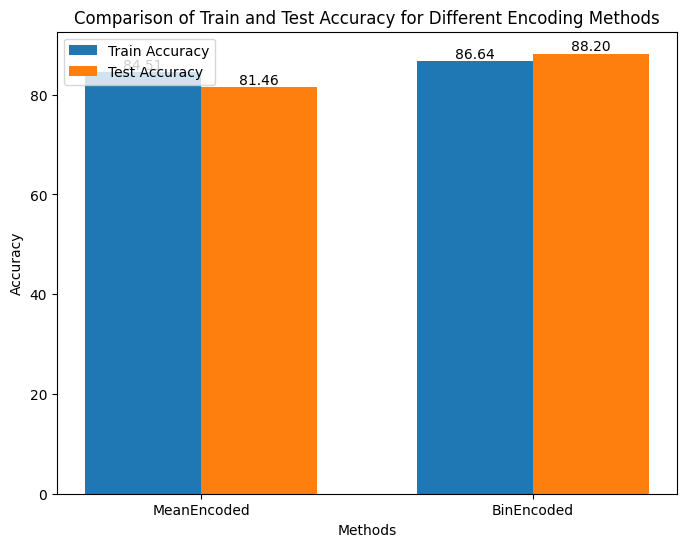

In [190]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have accuracy values for two algorithms on train and test data


train_accuracy_algorithm1 = acc1
test_accuracy_algorithm1 = a1

train_accuracy_algorithm2 = acc2
test_accuracy_algorithm2 = a2

# Set up the data
algorithms = ['MeanEncoded', 'BinEncoded']
train_accuracies = [train_accuracy_algorithm1, train_accuracy_algorithm2]
test_accuracies = [test_accuracy_algorithm1, test_accuracy_algorithm2]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bars
bar_width = 0.35
bar_positions_train = np.arange(len(algorithms))
bar_positions_test = bar_positions_train + bar_width

ax.bar(bar_positions_train, train_accuracies, bar_width, label='Train Accuracy')
ax.bar(bar_positions_test, test_accuracies, bar_width, label='Test Accuracy')

# Add values on top of the bars
for i, value in enumerate(train_accuracies):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(test_accuracies):
    plt.text(i + bar_width, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Methods')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Train and Test Accuracy for Different Encoding Methods')
ax.set_xticks(bar_positions_train + bar_width / 2)
ax.set_xticklabels(algorithms)
ax.legend()

# Show the plot
plt.show()


## Task 6

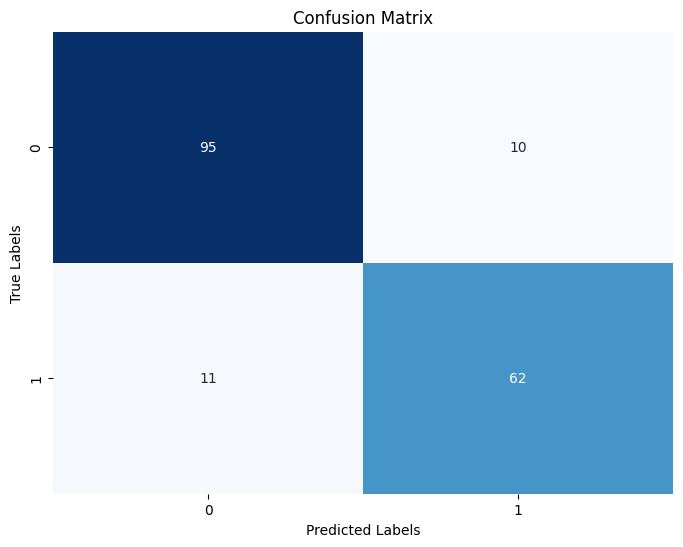

In [191]:
## show the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true labels and predicted labels, respectively
y_true = y_actual_sample2
y_pred = y_pred2

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Task 7

In [192]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true_test and y_pred_test are your true labels and predicted labels on the test split, respectively
y_true_test = y_actual_sample2
y_pred_test = y_pred2

# Compute precision, recall, and F1-score
precision = precision_score(y_true_test, y_pred_test)
recall = recall_score(y_true_test, y_pred_test)
f1 = f1_score(y_true_test, y_pred_test)

# Display the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Precision: 0.8611
Recall: 0.8493
F1-score: 0.8552


# LINEAR REGRESSION - 1


In [193]:
data = pd.read_csv("https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv")

In [194]:
data

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


### Task 1 (DATA EXPLORATION)

In [195]:
## Part (a)
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


Text(0.5, 1.0, 'Scatter Plot of Dataset')

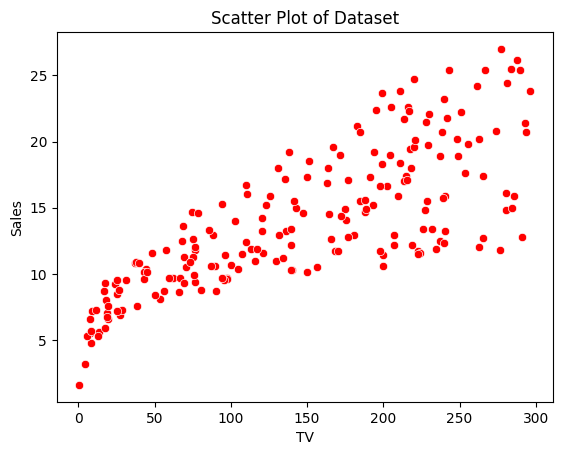

In [196]:
## Part (b)
sns.scatterplot(data, x=data["TV"], y=data["Sales"], color="red")
plt.title("Scatter Plot of Dataset")

## The dataset almost follows the linear pattern . We can establish a linear relation between 'Sales' and 'TV' columns feature

In [197]:
## Part (c)
mean_TV = data["TV"].mean()
std_TV = data["TV"].std()

mean_Sales = data["Sales"].mean()
std_Sales = data["Sales"].std()

print("Mean of TV : ",mean_TV, " Standard Deviation of TV : ",std_TV)
print("Mean of Sales : ",mean_Sales, " Standard Deviation of Sales : ",std_Sales)

## plotting a graph for mean and std



Mean of TV :  147.0425  Standard Deviation of TV :  85.85423631490808
Mean of Sales :  14.0225  Standard Deviation of Sales :  5.217456565710478


### Task 2 (DATA PREPROCESSING)

In [198]:
## Part (a)
## checking for missing values
data.isnull().sum()           ## no missing values

TV       0
Sales    0
dtype: int64

In [199]:
def minmax_normalization(X):
  columns = X.columns
  for col in columns:
    # if col != columns[len(columns) - 1]:
      # print(col)
      mn = X[col].min()
      mx = X[col].max()
      X[col] = X[col].apply(lambda x : (x - mn) / (mx - mn))
  return X

In [200]:
## Part (b)
## There are various methods of normalization
## 1. MinMax Scaling
## 2. Mean Normalization
## 3. Max Absolute Scaling
## 4. Robust Scaling

## MinMax Scaling is most commonly used
data = minmax_normalization(data)


In [201]:
data  ## Dataset after normalizing

,TV,Sales
0,0.775786,0.807087
1,0.148123,0.346457
2,0.055800,0.303150
3,0.509976,0.665354
4,0.609063,0.444882
...,...,...
195,0.126818,0.236220
196,0.316199,0.318898
197,0.596212,0.440945
198,0.956713,0.940945


<Axes: xlabel='TV', ylabel='Sales'>

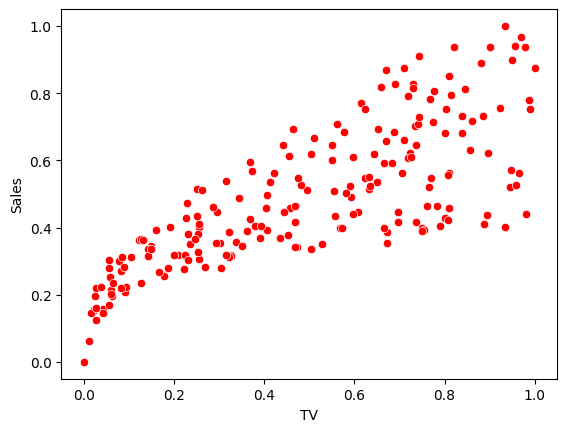

In [202]:
sns.scatterplot(data, x=data["TV"], y=data["Sales"], color="red")

In [203]:
## Part (c)
from sklearn.model_selection import train_test_split
X = data["TV"].values
y = data["Sales"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

### Task 3 (Linear Regression Implementation)

In [204]:
## Part (a)

## There are three types of Gradient Descent approach available
## 1. Batch Gradient Descent
## 2. Stochastic Gradient Descent
## 3. Mini-Batch Gradient Descent

import random

## Batch Gradient Descent

class BGDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        if (len(X_train.shape) == 1):
          self.coef_ = np.array(1)
          # print(self.coef_)
        else:
          self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        # print("entered")
        # print(np.dot(X_test,self.coef_)[0])
        return np.dot(X_test,self.coef_) + self.intercept_


# Mini Batch Gradient Descent

class MBGDRegressor:

    def __init__(self,batch_size,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        if (len(X_train.shape) == 1):
          self.coef_ = np.array(1)
          # print(self.coef_)
        else:
          self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):

            for j in range(int(X_train.shape[0]/self.batch_size)):

                idx = random.sample(range(X_train.shape[0]),self.batch_size)

                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                #print("Shape of y_hat",y_hat.shape)
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

# Stochastic Gradient Descent

class SGDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        if (len(X_train.shape) == 1):
          self.coef_ = np.array(1)
          # print(self.coef_)
        else:
          self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])

                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_

                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [205]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X_train1 = X_train.reshape(-1,1)
lr.fit(X_train1, y_train)
print("Slope : ",lr.coef_," Intercept : ",lr.intercept_)
X_test1 = X_test.reshape(-1,1)
y_pred1 = lr.predict(X_test1)
r2_score(y_test, y_pred1)

Slope :  [0.5416867]  Intercept :  0.2185909151254633


0.6766954295627076

In [206]:
## training BGDRegressor
from sklearn.metrics import r2_score
gdr = BGDRegressor(epochs=100,learning_rate=0.5)
gdr.fit(X_train,y_train)
y_pred1 = gdr.predict(X_test)
r2_1 = r2_score(y_test,y_pred1)

0.21825596914368106 0.5423077785063776


In [207]:
## training MBDGRegressor
mbr = MBGDRegressor(batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=100)
mbr.fit(X_train,y_train)
y_pred2 = mbr.predict(X_test)
r2_2 = r2_score(y_test,y_pred2)

0.23009354012420752 0.5456862817173727


In [208]:
## training SGDRegressor
sgd = SGDRegressor(learning_rate=0.01,epochs=40)
sgd.fit(X_train,y_train)
y_pred3 = sgd.predict(X_test)
r2_3 = r2_score(y_test,y_pred3)

0.20922901114045742 0.570001406488785


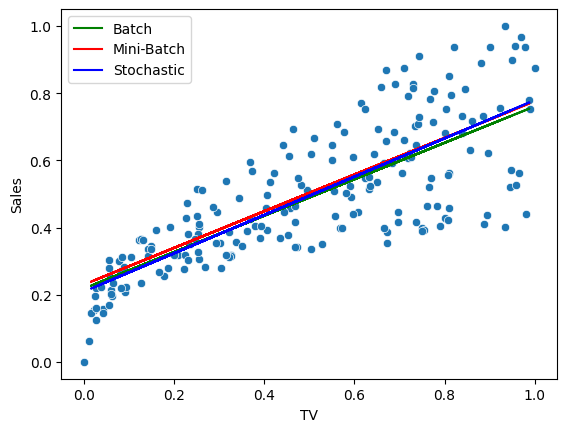

In [209]:
## Part (b)

## Plotting the regression line
sns.scatterplot(data, x=data["TV"], y=data["Sales"])
plt.plot(X_test,y_pred1, color="green", label="Batch")
plt.plot(X_test, y_pred2, color="red", label="Mini-Batch")
plt.plot(X_test, y_pred3,color="blue", label="Stochastic")
plt.legend()
plt.show()

### Task 3 (Evaluation)

In [210]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
prediction = {"Batch" : y_pred1,"MiniBatch" :  y_pred2, "Stochastic" : y_pred2}
mse_lst = []
mae_lst = []
for key, i in prediction.items():
  mse = mean_squared_error(y_test, i)
  mse_lst.append(mse)
  mae = mean_absolute_error(y_test, i)
  mae_lst.append(mae)
  print(key)
  print("MSE : ", mse, " MAE : ",mae)

Batch
MSE :  0.01581184013192958  MAE :  0.09618579827860425
MiniBatch
MSE :  0.015633011826806632  MAE :  0.09536938050148788
Stochastic
MSE :  0.015633011826806632  MAE :  0.09536938050148788


In [211]:
final_dict = {
    "NAME" : ["Batch", "Mini-Batch","Stochastic"],
    "R2_SCORE": [r2_1, r2_2, r2_3],
    "MSE" : mse_lst,
    "MAE" : mae_lst
}

report = pd.DataFrame(final_dict)

In [212]:
report

,NAME,R2_SCORE,MSE,MAE
0,Batch,0.676806,0.015812,0.096186
1,Mini-Batch,0.680461,0.015633,0.095369
2,Stochastic,0.682887,0.015633,0.095369


Text(0.5, 1.0, 'Mean Absolute Error')

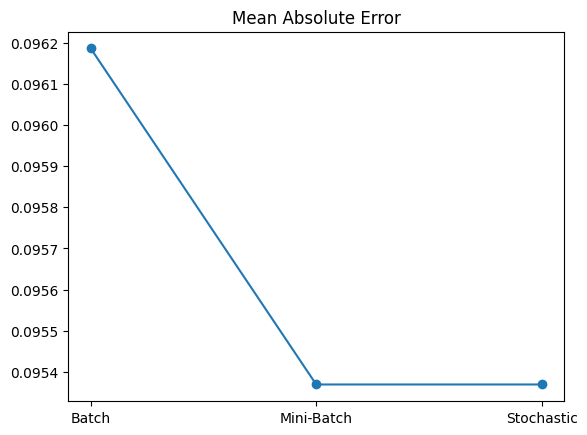

In [213]:
# plt.figure(figsize=(8, 6))
plt.plot(final_dict["NAME"], final_dict["MAE"], marker='o')
plt.title("Mean Absolute Error")

Text(0.5, 1.0, 'R2_SCORE')

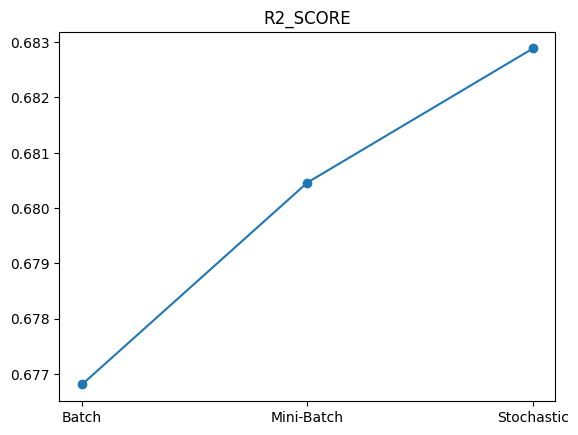

In [214]:
plt.plot(final_dict["NAME"], final_dict["R2_SCORE"], marker='o')
plt.title("R2_SCORE")

Text(0.5, 1.0, 'Mean Squared Error')

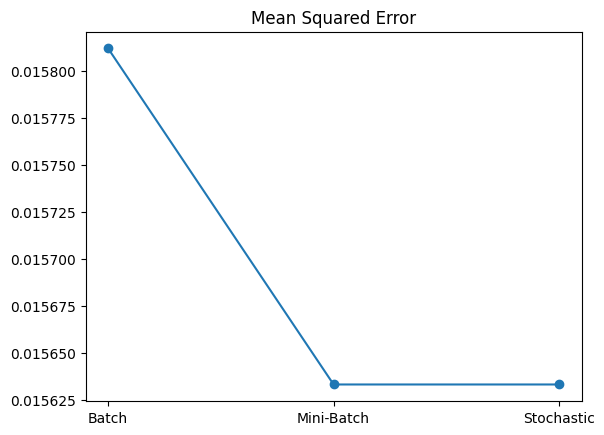

In [215]:
plt.plot(final_dict["NAME"], final_dict["MSE"], marker='o')
plt.title("Mean Squared Error")

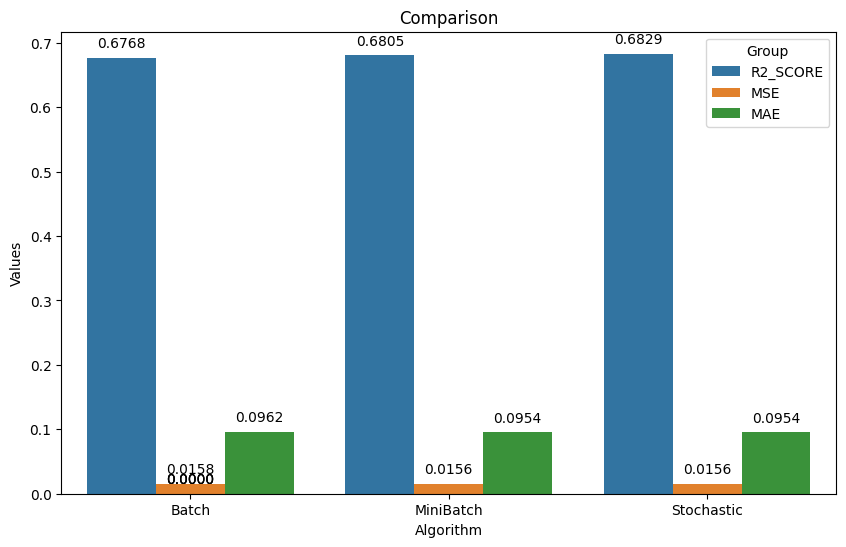

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
categories = ['Batch', 'MiniBatch', 'Stochastic']
data1 = [r2_1, r2_2, r2_3]
data2 = mse_lst
data3 = mae_lst

# Create a dataframe (this step is optional if you already have data in a suitable format)
import pandas as pd
df = pd.DataFrame({'Category': categories * 3, 'Data': data1 + data2 + data3, 'Group': ['R2_SCORE'] * 3 + ['MSE'] * 3 + ['MAE'] * 3})

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Data', hue='Group', data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Values')
plt.title('Comparison')

# Show the plot
plt.show()


# Linear Regression - 2

In [217]:
boston = pd.read_csv("/content/bostonHousingData.csv")

In [218]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Task 1 (DATA EXPLORATION)

In [219]:
## Part (a)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


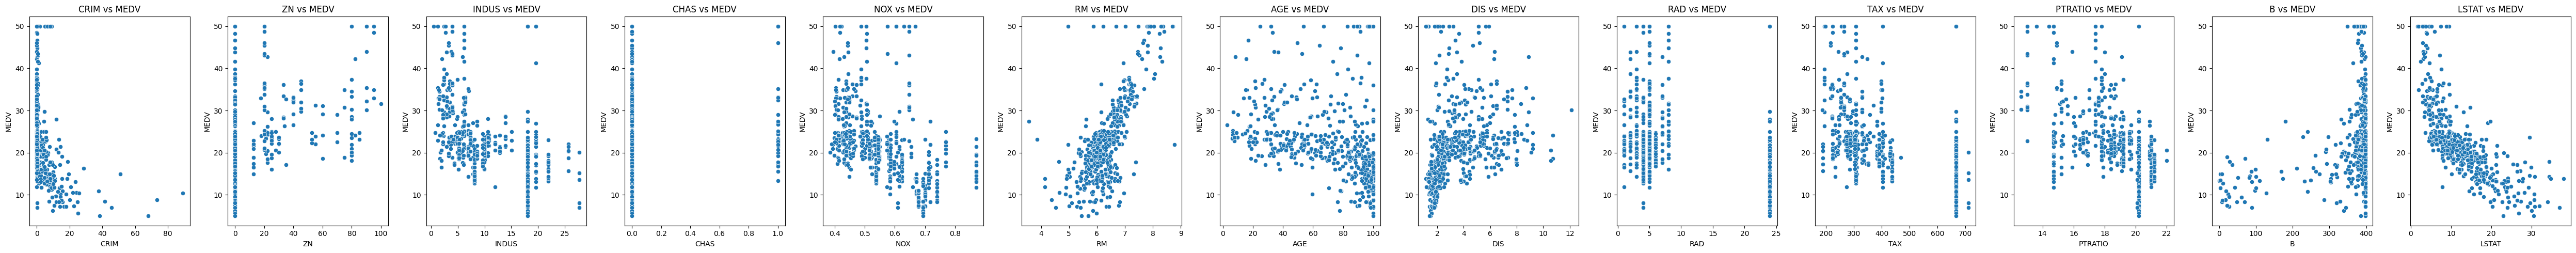

In [220]:
## Part (b)
## as the data is multi dimension , we can use pair plot
## medv is the value that we have to predict


# Extract the last column name
last_column_name = 'MEDV'

# Get the list of all column names except the last one
column_names_except_last = boston.columns[:-1]

# Determine the number of rows and columns for subplots
num_cols = len(column_names_except_last)
num_rows = 1  # You can adjust the number of rows based on your preference

# Set up the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 5))

# Flatten the axes to handle 1-row and multi-column layout
axes = axes.flatten()

# Create scatter plots for every column against the last column
for i, column in enumerate(column_names_except_last):
    sns.scatterplot(x=column, y=last_column_name, data=boston, ax=axes[i], markers=["o"])
    axes[i].set_title(f"{column} vs {last_column_name}")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [221]:
## Part (c)

mean_dict = boston.describe().iloc[1,:].to_dict()
std_dict = boston.describe().iloc[2,:].to_dict()
print("Mean of Features : ")
for key, mean in mean_dict.items():
  print(key," ",mean)

print("\n")
print("Standard Deviation of Features :")
for key, std in std_dict.items():
  print(key," ",std)

Mean of Features : 
CRIM   3.6118739711934156
ZN   11.2119341563786
INDUS   11.083991769547325
CHAS   0.06995884773662552
NOX   0.5546950592885376
RM   6.284634387351779
AGE   68.51851851851852
DIS   3.795042687747036
RAD   9.549407114624506
TAX   408.2371541501976
PTRATIO   18.455533596837945
B   356.6740316205534
LSTAT   12.715432098765433
MEDV   22.532806324110677


Standard Deviation of Features :
CRIM   8.720191850151599
ZN   23.388876146265478
INDUS   6.83589649864144
CHAS   0.2553404809065679
NOX   0.11587767566755595
RM   0.7026171434153233
AGE   27.99951300509237
DIS   2.105710126627611
RAD   8.707259384239366
TAX   168.53711605495903
PTRATIO   2.1649455237144406
B   91.29486438415783
LSTAT   7.155870815805251
MEDV   9.197104087379818


### Task 2(Data Preprocessing)

In [222]:
## Part (a)
## checking for missing values
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [223]:
boston = boston.fillna(boston.mean())

In [224]:
boston.isnull().sum()  ## no missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [225]:
def minmax_normalization(X):
  columns = X.columns
  for col in columns:
    # if col != columns[len(columns) - 1]:
      # print(col)
      mn = X[col].min()
      mx = X[col].max()
      X[col] = X[col].apply(lambda x : (x - mn) / (mx - mn))
  return X

In [226]:
## Part (b)
## There are various methods of normalization
## 1. MinMax Scaling
## 2. Mean Normalization
## 3. Max Absolute Scaling
## 4. Robust Scaling

## MinMax Scaling is most commonly used
boston = minmax_normalization(boston)


In [227]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.303130,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.303130,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [228]:
## Part (c)

In [229]:
## plotting the data using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X = boston.values
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(principalComponents,columns = ['1'])

In [230]:
principalDf

,1
0,-0.568163
1,-0.432166
2,-0.583806
3,-0.693300
4,-0.625194
...,...
501,-0.209729
502,-0.189379
503,-0.187981
504,-0.180570


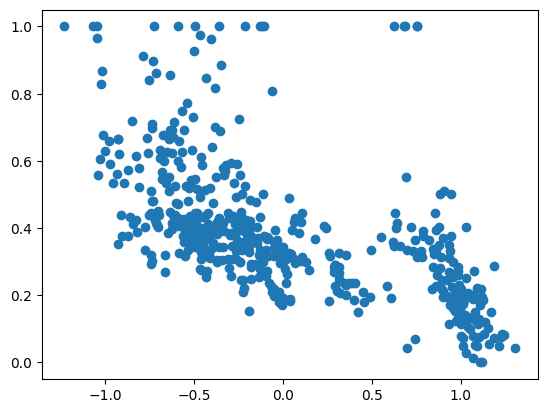

In [231]:
plt.scatter(x=principalDf["1"], y=boston["MEDV"])

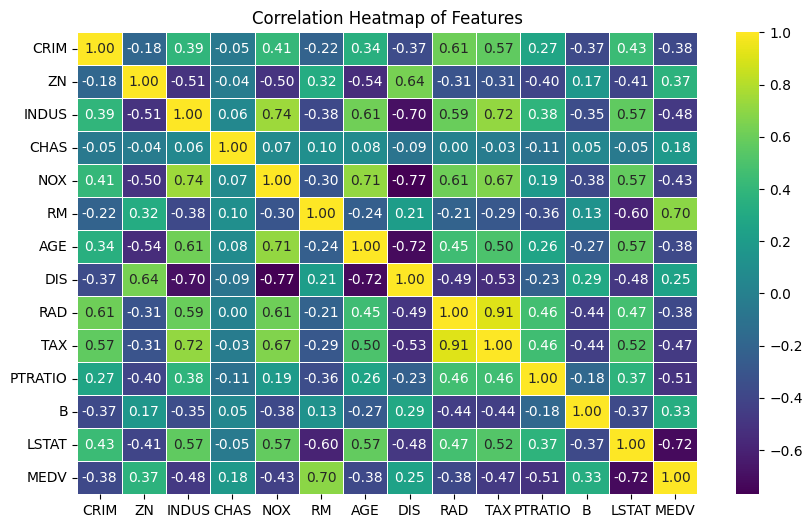

In [232]:
## heatmap to show the correlation of the features with one another
correlation_matrix = boston.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap of Features')
plt.show()

In [233]:
## sorting the correlation matrix to get the most useful 10 features for regression problem
correlation_matrix = boston.corr()
correlation_with_target = correlation_matrix['MEDV'].abs()
best_features = correlation_with_target.sort_values(ascending=False).index[:13]
best_features = best_features.to_list()
print(best_features)

['MEDV', 'LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'RAD', 'AGE', 'CRIM', 'ZN', 'B', 'DIS']


In [234]:
boston1 = boston[best_features]

In [235]:
from sklearn.model_selection import train_test_split
X = boston1.drop(columns=["MEDV"]).values
y = boston1["MEDV"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [236]:
boston1

,MEDV,LSTAT,RM,PTRATIO,INDUS,TAX,NOX,RAD,AGE,CRIM,ZN,B,DIS
0,0.422222,0.089680,0.577505,0.287234,0.067815,0.208015,0.314815,0.000000,0.641607,0.000000,0.18,1.000000,0.269203
1,0.368889,0.204470,0.547998,0.553191,0.242302,0.104962,0.172840,0.043478,0.782698,0.000236,0.00,1.000000,0.348962
2,0.660000,0.063466,0.694386,0.553191,0.242302,0.104962,0.172840,0.043478,0.599382,0.000236,0.00,0.989737,0.348962
3,0.631111,0.033389,0.658555,0.648936,0.063050,0.066794,0.150206,0.086957,0.441813,0.000293,0.00,0.994276,0.448545
4,0.693333,0.303130,0.687105,0.648936,0.063050,0.066794,0.150206,0.086957,0.528321,0.000705,0.00,1.000000,0.448545
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.386667,0.303130,0.580954,0.893617,0.420455,0.164122,0.386831,0.000000,0.681771,0.000633,0.00,0.987619,0.122671
502,0.346667,0.202815,0.490324,0.893617,0.420455,0.164122,0.386831,0.000000,0.760041,0.000438,0.00,1.000000,0.105293
503,0.420000,0.107892,0.654340,0.893617,0.420455,0.164122,0.386831,0.000000,0.907312,0.000612,0.00,1.000000,0.094381
504,0.377778,0.131071,0.619467,0.893617,0.420455,0.164122,0.386831,0.000000,0.889804,0.001161,0.00,0.991301,0.114514


### Task 3 (Linear Regression Implementation)

In [237]:
## training BGDRegressor
from sklearn.metrics import r2_score
gdr = BGDRegressor(epochs=100,learning_rate=0.01)
gdr.fit(X_train,y_train)
y_pred1 = gdr.predict(X_test)
r2_1 = r2_score(y_test,y_pred1)
print("R2 SCORE : ",r2_1)
if(r2_1 < 0):
  r2_1 = 0

-1.1183931333497517 [0.50493843 0.48088313 0.177368   0.37765479 0.2063744  0.42516322
 0.22638215 0.0911407  0.8774241  0.89994062 0.11508937 0.80589192]
R2 SCORE :  -3.9564207944136713


In [238]:
## training MBDGRegressor
mbr = MBGDRegressor(batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=1000)
mbr.fit(X_train,y_train)
y_pred2 = mbr.predict(X_test)
r2_2 = r2_score(y_test,y_pred2)
print("R2 SCORE : ",r2_2)

0.4014039279418027 [-0.35754489  0.56968358 -0.18593164 -0.00260558 -0.12200409 -0.1569335
  0.10649856 -0.04766005 -0.25675764  0.0677579   0.09631105 -0.36751057]
R2 SCORE :  0.6320403357689051


In [239]:
## training SGDRegressor
sgd = SGDRegressor(learning_rate=0.01,epochs=350)
sgd.fit(X_train,y_train)
y_pred3 = sgd.predict(X_test)
r2_3 = r2_score(y_test,y_pred3)
print("R2 SCORE : ",r2_3)

0.4117272829044428 [-0.37203511  0.57081132 -0.2035473   0.00272773 -0.13443663 -0.17268856
  0.10094399 -0.01644175 -0.23584226  0.0532689   0.09310588 -0.35403071]
R2 SCORE :  0.6322187738177629


In [240]:
## training the pca to get the line
pca_x_train = principalDf["1"].values
pca_y_train = boston1["MEDV"].values
sgd.fit(pca_x_train, pca_y_train )
y_pred4 = sgd.predict(pca_x_train)

0.3726096286837878 -0.18132974468768445


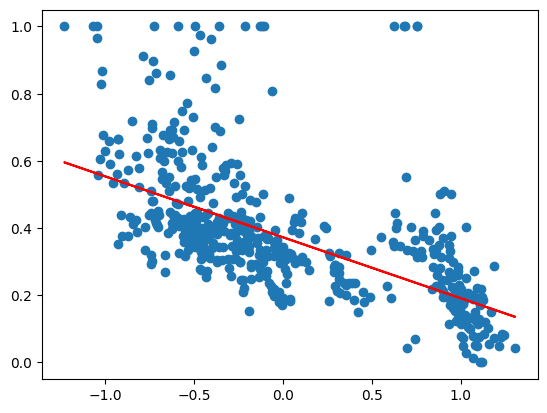

In [241]:
plt.scatter(x=principalDf["1"], y=boston["MEDV"])
plt.plot(pca_x_train, y_pred4, color="red")
plt.show()

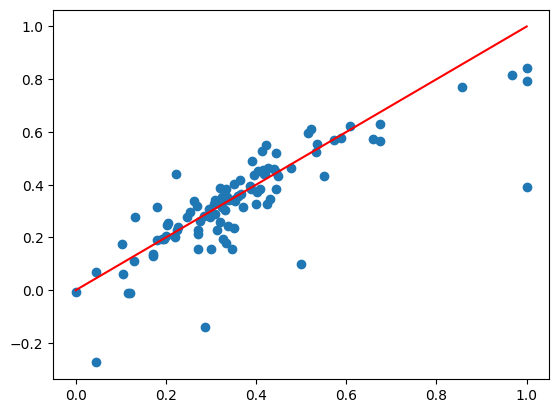

In [242]:
## plotting the y = x line and scatter plot to show how y_test differ from y_predicted
plt.plot([0,1],[0,1], color="red")
plt.scatter(x=y_test, y = y_pred2)

### Task 4 (EVALUATION)

In [243]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
prediction = {"Batch" : y_pred1,"MiniBatch" :  y_pred2, "Stochastic" : y_pred2}
mse_lst = []
mae_lst = []
for key, i in prediction.items():
  mse = mean_squared_error(y_test, i)
  if(mse > 50):
     mse = 1
  mse_lst.append(mse)
  mae = mean_absolute_error(y_test, i)
  if(mae > 50):
    mae = 1
  mae_lst.append(mae)
  print(key)
  print("MSE : ", mse, " MAE : ",mae)

Batch
MSE :  0.17949288285869028  MAE :  0.3585496190710994
MiniBatch
MSE :  0.01332536998936709  MAE :  0.06934813249096455
Stochastic
MSE :  0.01332536998936709  MAE :  0.06934813249096455


In [244]:
final_dict = {
    "NAME" : ["Batch", "Mini-Batch","Stochastic"],
    "R2_SCORE": [r2_1, r2_2, r2_3],
    "MSE" : mse_lst,
    "MAE" : mae_lst
}

report = pd.DataFrame(final_dict)

In [245]:
report

,NAME,R2_SCORE,MSE,MAE
0,Batch,0.000000,0.179493,0.358550
1,Mini-Batch,0.632040,0.013325,0.069348
2,Stochastic,0.632219,0.013325,0.069348


Text(0.5, 1.0, 'Mean Absolute Error')

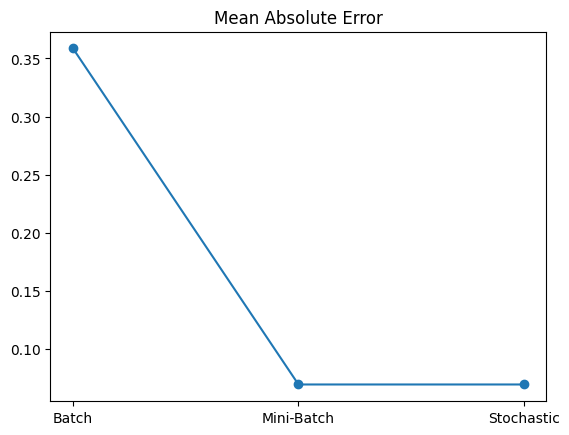

In [246]:
# plt.figure(figsize=(8, 6))
plt.plot(final_dict["NAME"], final_dict["MAE"], marker='o')
plt.title("Mean Absolute Error")

Text(0.5, 1.0, 'R2_SCORE')

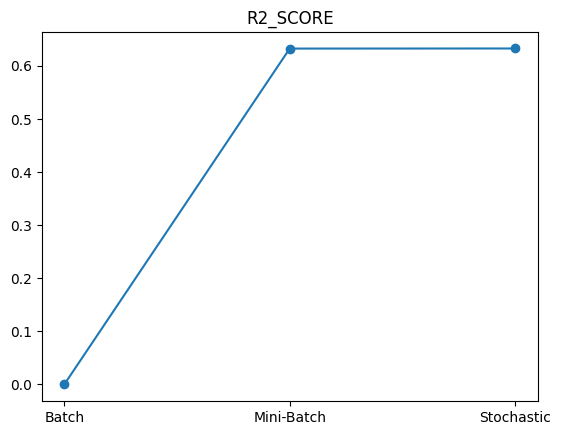

In [247]:
plt.plot(final_dict["NAME"], final_dict["R2_SCORE"], marker='o')
plt.title("R2_SCORE")

Text(0.5, 1.0, 'Mean Squared Error')

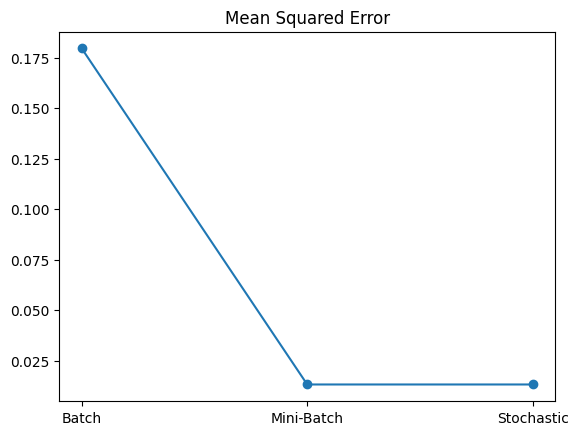

In [248]:
plt.plot(final_dict["NAME"], final_dict["MSE"], marker='o')
plt.title("Mean Squared Error")

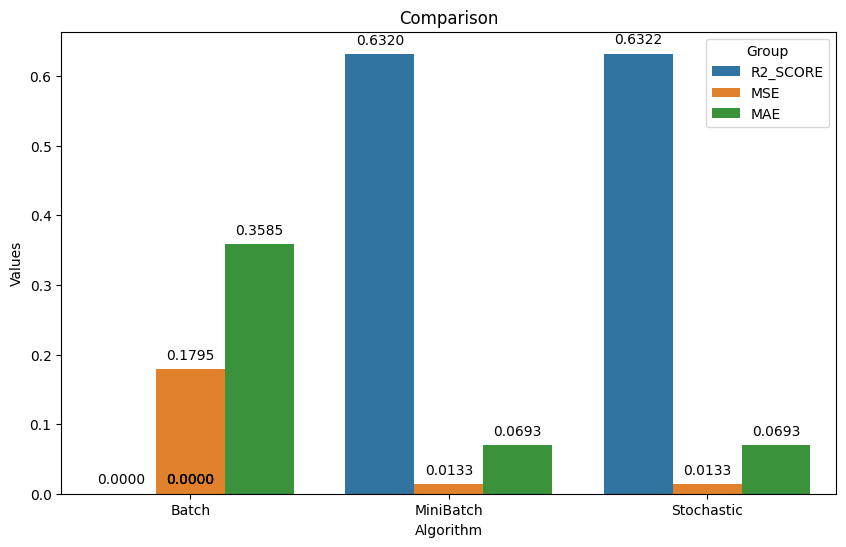

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
categories = ['Batch', 'MiniBatch', 'Stochastic']
data1 = [r2_1, r2_2, r2_3]
data2 = mse_lst
data3 = mae_lst

# Create a dataframe (this step is optional if you already have data in a suitable format)
import pandas as pd
df = pd.DataFrame({'Category': categories * 3, 'Data': data1 + data2 + data3, 'Group': ['R2_SCORE'] * 3 + ['MSE'] * 3 + ['MAE'] * 3})

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Data', hue='Group', data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Values')
plt.title('Comparison')

# Show the plot
plt.show()

In [250]:
## Hence from the above plot we can see that 'Stochastic' is performing best on this dataset.